In [76]:
'''
accuracy: 0.77511(未数据标准化)
accuracy: 0.76794(数据标准化)
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [77]:
data = pd.DataFrame({'x':[1, 2, 3], 'y':['a', 'b', 'c']})
data = pd.get_dummies(data, columns=['y'], prefix_sep = '_', dummy_na = False, drop_first = False)
data

,x,y_a,y_b,y_c
0,1,True,False,False
1,2,False,True,False
2,3,False,False,True


In [78]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
women = train_data.loc[train_data['Sex'] == 'female']["Survived"]
men = train_data.loc[train_data['Sex'] == 'male']["Survived"]
rate_women = sum(women)/len(women)
rate_men = sum(men)/len(men)
print("% of women who survived:", rate_women)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [80]:
train_data.isnull().sum(), test_data.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [81]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)

C:\Users\bilbo\AppData\Local\Temp\ipykernel_4872\2358097945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
C:\Users\bilbo\AppData\Local\Temp\ipykernel_4872\2358097945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [88]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
Y = train_data["Survived"]
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(Y_train.shape)
print(X_dev.shape)
print(Y_dev.shape)
print(X_test.shape)
type(X_train), type(X_test)

(712, 10)
(712,)
(179, 10)
(179,)
(418, 10)


(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [83]:
a = np.array([[1,2,3],[4,5,6]])
print(a.mean(axis = 0).reshape(1, a.shape[1]))

[[2.5 3.5 4.5]]


In [89]:
# 标准化操作
def Standardization(data):
    m = data.shape[1]
    miu = data.mean(axis = 0).reshape(1,m)
    sigma = data.std(axis = 0).reshape(1,m)

    data = (data - miu)/sigma

    return data
X_train = Standardization(X_train.astype(float).values)
X_dev  = Standardization(X_dev.astype(float).values)
X_test = Standardization(X_test.astype(float).values)

In [90]:
# 建立模型
model = RandomForestClassifier(n_estimators = 230, max_depth = 3, random_state = 1)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=230, random_state=1)

In [91]:
print(sum(Y_dev))

73


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[94 12]
 [24 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.80      0.67      0.73        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



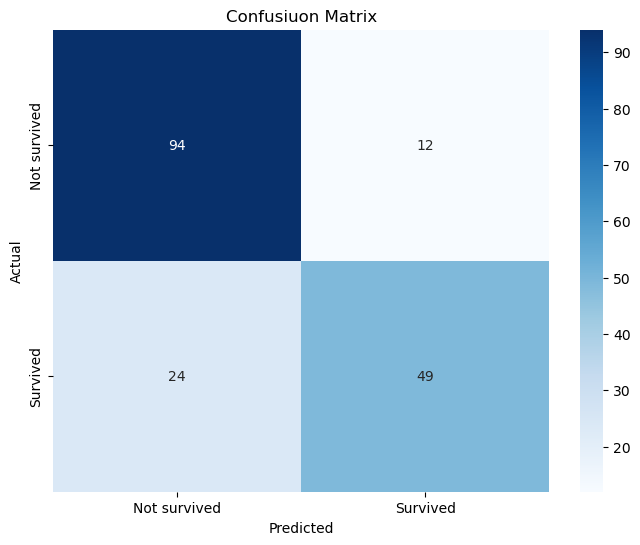

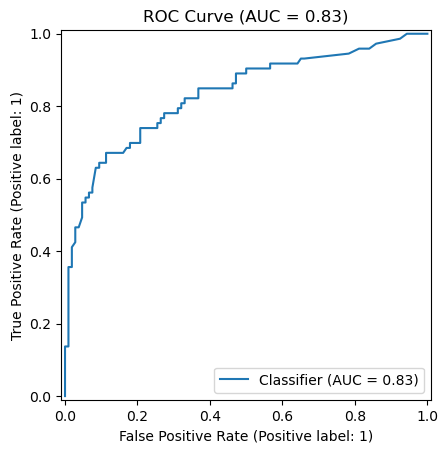

In [92]:
# 性能评估
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

Y_pred = model.predict(X_dev)

accuracy = accuracy_score(Y_dev, Y_pred)
conf_matrix = confusion_matrix(Y_dev, Y_pred)
class_report = classification_report(Y_dev, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = ["Not survived", "Survived"], yticklabels = ["Not survived", "Survived"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusiuon Matrix")
plt.show()

y_prob = model.predict_proba(X_dev)[:, 1]
roc_auc = roc_auc_score(Y_dev, y_prob)
RocCurveDisplay.from_predictions(Y_dev, y_prob)
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

In [94]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state = 1)

parameters_grid = {
    'n_estimators':range(300, 401, 10),
    'max_depth':[None, 8, 9, 10],
    'min_samples_split':[1, 2, 3],
    'min_samples_leaf':[0, 1, 2],
    'max_features':['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = model, param_grid = parameters_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

d:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4180 fits failed out of a total of 5940.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1058 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.8525657441150398


In [95]:
model = RandomForestClassifier(n_estimators = 300, max_depth = 8, max_features='sqrt',
                               min_samples_leaf = 1, min_samples_split = 2,random_state = 1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv("结果/result2.csv", index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
